In [1]:
import os
import sys
import re

import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import *

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
pwd

'/Users/shravanlattupally'

In [3]:
 # import data
df = pd.read_csv ('/Users/shravanlattupally/Desktop/5589.csv')
df.head()

/Users/shravanlattupally/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,70,72,74,85,86,88,90,92,93,94,95,97,98,99,102,104,106,108,109,110,111,113,114,115,118,120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,FK_Trip,FK_MeasurementType,Created_Date,...,end_position_display.precision,end_position_display.longitude,end_position_display.county,end_position_display.state,end_position_display.street,end_position_display.postal_code,end_position_display.postcode,end_position_display.address,end_position_display.latitude,end_position_display.type
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,36c12ed9-3d71-4c87-985c-0156f3f3a3a8,2020-12-23 10:35:54.541221+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,43f6e697-19b3-40f8-b95d-06c205fd3758,a69d9fe0-7896-49e2-9e8d-e36f0d54f286,2020-12-23 10:28:26.506338+00:00,...,street_segment,12.37962,Furesø Municipality,Capital Region of Denmark,Hillerødmotorvejen,3520.0,3520.0,"Hillerødmotorvejen, Farum, 3520, DK",55.802459,geocode
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,a1917940-8ad5-4296-b0ac-4cb9d070ce47,2020-12-23 11:40:43.998383+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,be871b9c-761c-4420-9bb1-d14b20681efd,2020-11-01 11:54:51.576239+00:00,obd.trq_eff,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,10d94f48-b85f-433b-b9e1-58f9b22ec441,2020-12-23 11:40:44.007629+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8fc83316-a912-425f-89d1-4f526ea91a76,2020-11-01 11:54:51.576239+00:00,obd.trq_req,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,e94864c5-29e6-4d2f-a470-f8b9799e9618,2020-12-23 11:40:44.016714+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas
pandas.set_option('display.max_rows',100)
print(df)

                                MeasurementId  \
0        c491a854-311f-4ed8-a5a2-abf5add576cd   
1        0c87b325-4e10-4c66-b588-a2d4ff4aad74   
2        e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1   
3        be871b9c-761c-4420-9bb1-d14b20681efd   
4        8fc83316-a912-425f-89d1-4f526ea91a76   
...                                       ...   
1929865  0374a87c-5ce3-4f93-bebe-9ea2912e47bf   
1929866  4b072734-c961-4502-ab33-33f48dfa26b7   
1929867  2aa38cab-64d5-437b-b745-95bd870f7eb9   
1929868  fb6ff0e9-b22d-4bcd-b4eb-a0d8818234c6   
1929869  9fc68afe-af87-4383-abbf-3455932fe9d7   

                           TS_or_Distance                    T       lat  \
0        2020-11-01 11:54:51.563541+00:00  event.vehicle.motor       NaN   
1        2020-11-01 11:54:51.563541+00:00            track.pos  55.73293   
2        2020-11-01 11:54:51.576198+00:00      obd.whl_trq_est       NaN   
3        2020-11-01 11:54:51.576239+00:00          obd.trq_eff       NaN   
4        2020-11-01 11:54:51.57

In [5]:
df['device']

0                                           NaN
1          85d44a66-4ecb-4fdc-91be-0a18b2d7ebdb
2                                           NaN
3                                           NaN
4                                           NaN
                           ...                 
1929865                                     NaN
1929866                                     NaN
1929867                                     NaN
1929868                                     NaN
1929869    85d44a66-4ecb-4fdc-91be-0a18b2d7ebdb
Name: device, Length: 1929870, dtype: object

In [6]:
df.device.unique()

array([nan, '85d44a66-4ecb-4fdc-91be-0a18b2d7ebdb'], dtype=object)

In [7]:
df.shape

(1929870, 121)

In [8]:
# reducing to small size, for better experience
SIZE = 10000
size = min(len(df["lat"]), SIZE)
df = df.drop(range(size, len(df["lat"])))
print (len(df["lat"]))

10000


In [9]:
# take a backup of DataFrame
copy_of_df = df.copy()

In [10]:
def drop_custom_columns(df):
  list_1 = ['FK_Trip','FK_MeasurementType','Created_Date','Updated_Date','id','start_time_utc','end_time_utc','Updated_Date']
  list_2 = ['obd.ww_f_req.value','obd.trac_cons.value','obd.trip_cons.value','obd.trip_cons_avg.value','obd.trip_dist.value',
 'obd.trip_spd_avg.value','obd.trq_eff.value','obd.trq_req.value', 'obd.whl_prs_fl.value','obd.whl_prs_fr.value','obd.whl_prs_rl.value',
 'obd.whl_prs_rr.value','obd.whl_trq_est.value','obd.whl_trq_pot_ri.value','obd.ww_f_req.value','obd.ww_f_stat.value',
 'obd.ww_f_stop.value']
  list_3 = ['duration','distanceKm','tag','rpi.temp.cpu.unit','rpi.temp.cpu.value','rpi.temp.gpu.unit',
 'rpi.temp.gpu.value','start_position_display.ntk_geocode_time','start_position_display.city','start_position_display.street_type',
 'start_position_display.country','start_position_display.street_name','start_position_display.provider','start_position_display.precision',
 'start_position_display.longitude','start_position_display.county','start_position_display.state','start_position_display.street',
 'start_position_display.postal_code','start_position_display.postcode','start_position_display.address','start_position_display.latitude',
 'start_position_display.type','end_position_display.ntk_geocode_time','end_position_display.city','end_position_display.street_type',
 'end_position_display.country','end_position_display.street_name','end_position_display.provider','end_position_display.precision',
 'end_position_display.longitude','end_position_display.county','end_position_display.state','end_position_display.street',
 'end_position_display.postal_code','end_position_display.postcode','end_position_display.address','end_position_display.latitude',
 'end_position_display.type']
  columns_should_be_deleted = list_1 + list_2 + list_3
  columns_which_are_really_in_df = []
  for column_name in columns_should_be_deleted:
    if column_name in df:
      columns_which_are_really_in_df.append(column_name)
  df = df.drop(columns_which_are_really_in_df, axis=1)
  return df

In [11]:
df = drop_custom_columns(df)

In [12]:
df.shape

(10000, 59)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MeasurementId               10000 non-null  object 
 1   TS_or_Distance              10000 non-null  object 
 2   T                           10000 non-null  object 
 3   lat                         5 non-null      float64
 4   lon                         5 non-null      float64
 5   message                     10000 non-null  object 
 6   isComputed                  10000 non-null  bool   
 7   @vid                        9999 non-null   float64
 8   @uid                        9999 non-null   object 
 9   @ts                         10000 non-null  object 
 10  @t                          9999 non-null   object 
 11  @rec                        9999 non-null   object 
 12  acc.xyz.z                   271 non-null    float64
 13  acc.xyz.y                   271 

In [14]:
def parse_recursive_dict(data, result = {}):
  for key in data:
    if "dict" in str(type(data[key])):
      result = parse_recursive_dict(data[key], result)
    else:
      result.update({
          key: data[key]
      })
  return result

In [15]:
def split_a_utc_time(time_, splitter = " "):
  preprocessed = time_.split("+",)[0]
  date_time = preprocessed.split(splitter,)
  year_, month_, date_ = [int(number) for number in date_time[0].split("-", )]
  hour_, minute_, second_ = [int(number) for number in date_time[1][:date_time[1].index('.')].split(":", )]
  mseconds_ = int(date_time[1].split('.', )[1])
  result = {
      "year": year_,
      "month": month_,
      "date": date_,
      "hour": hour_,
      "minute": minute_,
      "second": second_,
      "mseconds": mseconds_
  }
  return result

In [16]:
def get_splitter_if_it_is_UTC_time(time_frame):
  if "str" in str(type(time_frame)):
    if 28<=len(time_frame)<=35:
      time_frame = time_frame.strip()
      pattern_1 = re.compile(r'\d\d\d-\d\d-\d\d \d\d:\d\d:\d\d.')
      pattern_2 = re.compile(r'\d\d\d-\d\d-\d\dT\d\d:\d\d:\d\d.')
      result_1 = pattern_1.search(time_frame)
      result_2 = pattern_2.search(time_frame)
      if (result_1 is None) and (result_2 is not None):
        return "T"
      if (result_1 is not None) and (result_2 is None):
        return " "
  return None

In [17]:
import json
columns_to_be_deleted = ["message"]
for index in range(2):
  for column in df.columns:
    if column == "message":
      message = json.loads(df[column][index])
      flatten_message = parse_recursive_dict(message)
      for label in flatten_message:
        if label in df:
          df[label][index] = flatten_message[label]
        else:
          df[label] = None
    splitter = get_splitter_if_it_is_UTC_time(df[column][index])
    if splitter is not None:
      sub_time = split_a_utc_time(df[column][index], splitter = splitter)
      if column not in columns_to_be_deleted:
        columns_to_be_deleted.append(column)
      for sub_time_cells in sub_time:
        df[column+"_"+sub_time_cells] = None
        df[column+"_"+sub_time_cells][index] = sub_time[sub_time_cells]

<ipython-input-17-f3ef2fbed461>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column+"_"+sub_time_cells][index] = sub_time[sub_time_cells]
<ipython-input-17-f3ef2fbed461>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label][index] = flatten_message[label]


In [18]:
df.head()

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@vid,@uid,@ts,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.563541+00:00,...,None,None,None,None,None,None,None,None,None,None
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,0001-01-01T00:00:00+00:00,...,54,51,563541,2020,11,1,12,10,14,399773
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576198+00:00,...,None,None,None,None,None,None,None,None,None,None
3,be871b9c-761c-4420-9bb1-d14b20681efd,2020-11-01 11:54:51.576239+00:00,obd.trq_eff,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576239+00:00,...,None,None,None,None,None,None,None,None,None,None
4,8fc83316-a912-425f-89d1-4f526ea91a76,2020-11-01 11:54:51.576239+00:00,obd.trq_req,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576239+00:00,...,None,None,None,None,None,None,None,None,None,None


In [19]:
# drop columns having null and less unique values
df = drop_custom_columns(df)

In [20]:
df.head(3)

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@vid,@uid,@ts,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.563541+00:00,...,None,None,None,None,None,None,None,None,None,None
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,0001-01-01T00:00:00+00:00,...,54,51,563541,2020,11,1,12,10,14,399773
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576198+00:00,...,None,None,None,None,None,None,None,None,None,None


In [21]:
def drop_columns_have_unique_value(df):
  columns_to_deleted = []
  for column_name in df.columns:
    uniques = len(set(df[column_name]))
    if (uniques in [1]) or df[column_name].isnull().sum()==len(df[column_name]):
      columns_to_deleted.append(column_name)
  df = df.drop(columns_to_deleted, axis=1)
  return df

In [22]:
df = drop_columns_have_unique_value(df)

In [23]:
df.head(3)

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@ts,@t,@rec,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.563541+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,...,None,None,None,None,None,None,None,None,None,None
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,0001-01-01T00:00:00+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,...,54,51,563541,2020,11,1,12,10,14,399773
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.576198+00:00,obd.whl_trq_est,2020-11-01T15:40:36.679279+00:00,...,None,None,None,None,None,None,None,None,None,None


In [24]:
df.shape

(10000, 92)

In [25]:
df = df.fillna(value=np.nan)

In [26]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", verbose=0)

In [27]:
columns_having_numbers_and_nulls = []
for column_name in df.columns:
  dtype = df.dtypes[column_name]
  if dtype.name == "float64" and df[column_name].isnull().sum()<len(df[column_name]):
    columns_having_numbers_and_nulls.append(column_name)

In [28]:
df[columns_having_numbers_and_nulls]

,lat,lon,acc.xyz.z,acc.xyz.y,acc.xyz.x,obd.acc_long.value,obd.acc_trans.value,obd.acc_yaw.value,obd.asr_trq_req_dyn.value,obd.asr_trq_req_st.value,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55.73293,12.46941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
imputer = imputer.fit(df[columns_having_numbers_and_nulls])
df[columns_having_numbers_and_nulls] = imputer.transform(df[columns_having_numbers_and_nulls])

In [30]:
df.head()

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@ts,@t,@rec,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,55.730184,12.475208,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.563541+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.732930,12.469410,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,0001-01-01T00:00:00+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,55.730184,12.475208,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.576198+00:00,obd.whl_trq_est,2020-11-01T15:40:36.679279+00:00,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
3,be871b9c-761c-4420-9bb1-d14b20681efd,2020-11-01 11:54:51.576239+00:00,obd.trq_eff,55.730184,12.475208,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.576239+00:00,obd.trq_eff,2020-11-01T15:40:36.679301+00:00,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
4,8fc83316-a912-425f-89d1-4f526ea91a76,2020-11-01 11:54:51.576239+00:00,obd.trq_req,55.730184,12.475208,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,2020-11-01T11:54:51.576239+00:00,obd.trq_req,2020-11-01T15:40:36.679324+00:00,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0


In [31]:
contamination = 0.01
data = df.copy()

Label Encode

In [32]:

for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col].fillna("None", inplace=True)
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
    else:
        data[col].fillna(-999, inplace=True)

In [33]:
data.head()

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@ts,@t,@rec,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,7722,0,2,55.730184,12.475208,0,True,1,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
1,460,0,50,55.732930,12.469410,9999,False,0,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
2,9151,1,45,55.730184,12.475208,1,True,2,45,369,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
3,7478,2,39,55.730184,12.475208,3,True,3,39,370,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
4,5637,2,40,55.730184,12.475208,4,True,3,40,371,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0


In [34]:
columns_having_unique_values = []
for column_name in data.columns:
  if len(set(df[column_name])) == 1:
    columns_having_unique_values.append(column_name)
print ("number of columns which are having only one value for all rows", len(columns_having_unique_values))

number of columns which are having only one value for all rows 56


In [35]:
data.head()

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@ts,@t,@rec,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,7722,0,2,55.730184,12.475208,0,True,1,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
1,460,0,50,55.732930,12.469410,9999,False,0,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
2,9151,1,45,55.730184,12.475208,1,True,2,45,369,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
3,7478,2,39,55.730184,12.475208,3,True,3,39,370,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
4,5637,2,40,55.730184,12.475208,4,True,3,40,371,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0


In [36]:
data.shape

(10000, 92)

In [37]:
set(data["isComputed"])

{False, True}

In [38]:
data["isComputed"] = data["isComputed"].replace({True: 1, False: 0})

In [39]:
data.head()

,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,@ts,@t,@rec,...,start_time_utc_minute,start_time_utc_second,start_time_utc_mseconds,end_time_utc_year,end_time_utc_month,end_time_utc_date,end_time_utc_hour,end_time_utc_minute,end_time_utc_second,end_time_utc_mseconds
0,7722,0,2,55.730184,12.475208,0,1,1,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
1,460,0,50,55.732930,12.469410,9999,0,0,2,0,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
2,9151,1,45,55.730184,12.475208,1,1,2,45,369,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
3,7478,2,39,55.730184,12.475208,3,1,3,39,370,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0
4,5637,2,40,55.730184,12.475208,4,1,3,40,371,...,54.0,51.0,563541.0,2020.0,11.0,1.0,12.0,10.0,14.0,399773.0


In [40]:
data.dtypes

MeasurementId                   int64
TS_or_Distance                  int64
T                               int64
lat                           float64
lon                           float64
message                         int64
isComputed                      int64
@ts                             int64
@t                              int64
@rec                            int64
acc.xyz.z                     float64
acc.xyz.y                     float64
acc.xyz.x                     float64
@tag                            int64
obd.acc_long.value            float64
obd.acc_trans.value           float64
obd.acc_yaw.value             float64
obd.asr_trq_req_dyn.value     float64
obd.asr_trq_req_st.value      float64
obd.brk_trq_elec.value        float64
obd.brk_trq_req_dvr.value     float64
obd.brk_trq_req_elec.value    float64
obd.cons_avg.value            float64
obd.f_dist.value              float64
obd.msr_trq_req.value         float64
obd.odo.value                 float64
obd.rpm.valu

Isolation Forest - Training the model

In [41]:
%%time

model = IsolationForest(contamination=contamination, n_estimators=1000)
model.fit(data)

CPU times: user 3.92 s, sys: 41.5 ms, total: 3.96 s
Wall time: 3.96 s


IsolationForest(contamination=0.01, n_estimators=1000)

In [42]:
df["iforest"] = pd.Series(model.predict(data))
df["iforest"] = df["iforest"].map({1: 0, -1: 1})
print(df["iforest"].value_counts())

0    9900
1     100
Name: iforest, dtype: int64


In [43]:
100 / 9900

0.010101010101010102

In [44]:
# The output 0.01 what we got is exactly the contamination we specified when we actually crested the model.

KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
model = KNeighborsClassifier(n_neighbors=7)

In [47]:
X = data.drop("isComputed", axis=1)
Y = data["isComputed"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=7)

In [51]:
result = model.predict(x_test)

In [52]:
score = accuracy_score(y_test, result)

In [53]:
score

0.9996666666666667

KMeans Cluster

Elbow Method to Identify Clusters

In [54]:
import sklearn.cluster as cluster

In [100]:
df_short =data[['@tag','@ts']]

In [101]:
# WSS = within-cluster-sum of squared
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [102]:
mycenters=pd.DataFrame({'Clusters':K, 'WSS':wss})
mycenters

,Clusters,WSS
0,1,1.423412e+10
1,2,3.560251e+09
2,3,1.581460e+09
3,4,8.889412e+08
4,5,5.721716e+08
5,6,3.967160e+08
6,7,2.920376e+08
7,8,2.226001e+08
8,9,1.758838e+08
9,10,1.425114e+08


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

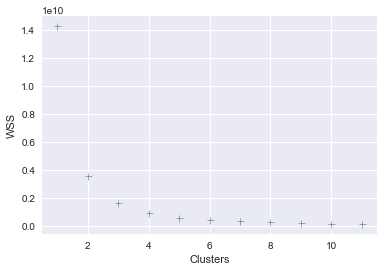

In [103]:
sns.scatterplot(x ='Clusters', y = 'WSS', data =mycenters, marker="+")

In [104]:
# 3 clusters are identified as per Elbow Method

In [105]:

import sklearn.metrics as metrics

In [106]:
for i in range(3,12):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(df_short).labels_
    print("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(df_short,labels,metric="euclidean",sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5871404404835006
Silhouette score for k(clusters) = 4 is 0.5776806356185942
Silhouette score for k(clusters) = 5 is 0.552570993467883
Silhouette score for k(clusters) = 6 is 0.551447505622184
Silhouette score for k(clusters) = 7 is 0.5387006201852046
Silhouette score for k(clusters) = 8 is 0.5395290172727482
Silhouette score for k(clusters) = 9 is 0.5441151801536159
Silhouette score for k(clusters) = 10 is 0.5258772356814065
Silhouette score for k(clusters) = 11 is 0.5360000487896223


Perform K-Mean Clustering with 3 clusters

In [107]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++")
kmeans = kmeans.fit(data[['@tag','@ts']])

In [108]:
# Plot Clusters on Chart
data['Clusters'] = kmeans.labels_

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='@tag', ylabel='@ts'>

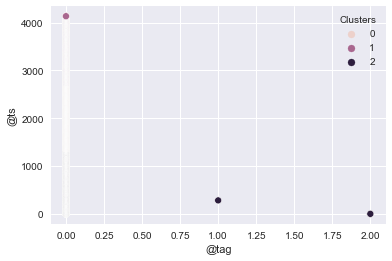

In [109]:
sns.scatterplot(x='@tag', y='@ts', hue='Clusters', data=data)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='lon', ylabel='@ts'>

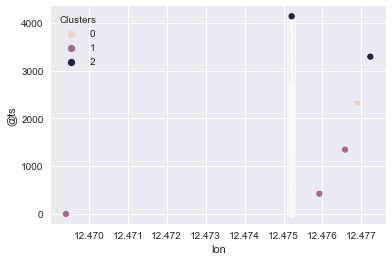

In [96]:
sns.scatterplot(x='lon', y='@ts', hue='Clusters', data=data)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='@ts', ylabel='@t'>

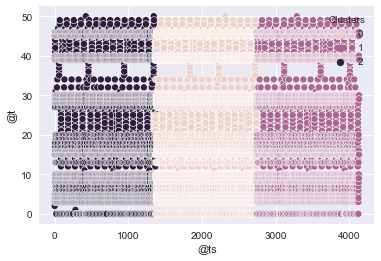

In [110]:
sns.scatterplot(x='@ts', y='@t', hue='Clusters', data=data)